# 03/05 - Pair Programming Estadística 1 - Guadalupe & Lara

In [26]:
import numpy as np
from scipy import stats # importando scipy.stats.
import pandas as pd # importando pandas
import seaborn as sns
import matplotlib.pyplot as plt


**Los objetivos de hoy son:**


1- **Buscar un conjunto de datos a analizar:**

Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas. Ya que tambien se analizarán.

*Hemos seleccionado un dataset de la página "Kaggle", que es un informe que trata sobre el estado de la felicidad en el mundo y que recoge indicadores adicionales a los económicos para tratar el bienestar.*

In [10]:
df = pd.read_csv("/mnt/d/Descargas/Python/Modulo 2/Pair Programming 2/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


2- **Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:**

-**Media**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [30]:
df_proyecto = df[["GDP per capita", "Perceptions of corruption"]]
df_proyecto.head(3)

,GDP per capita,Perceptions of corruption
0,1.340,0.393
1,1.383,0.410
2,1.488,0.341


In [13]:
media_gdp = df["GDP per capita"].mean()
media_gdp


0.9051474358974363

In [15]:
media_corruption = np.mean(df["Perceptions of corruption"])
media_corruption

0.11060256410256411

- **Desviación con respecto de la media**

In [16]:
desviacion_mediagdp = np.abs(df["GDP per capita"] - media_gdp)
desviacion_mediagdp

0      0.434853
1      0.477853
2      0.582853
3      0.474853
4      0.490853
         ...   
151    0.546147
152    0.429147
153    0.555147
154    0.879147
155    0.599147
Name: GDP per capita, Length: 156, dtype: float64

In [18]:
desviacion_mediacorruption = np.abs(df["Perceptions of corruption"] - media_corruption)
desviacion_mediacorruption

0      0.282397
1      0.299397
2      0.230397
3      0.007397
4      0.187397
         ...   
151    0.300397
152    0.036397
153    0.085603
154    0.075603
155    0.019603
Name: Perceptions of corruption, Length: 156, dtype: float64

- **Varianza**

In [19]:
varianza_gdp = np.var(df["GDP per capita"])
varianza_gdp

0.15769676672419455

In [21]:
varianza_corruption = np.var(df["Perceptions of corruption"])
varianza_corruption

0.008880111275476658

- **Desviación típica**

In [22]:
destipica_gdp = np.std(df["GDP per capita"])
destipica_gdp

0.39711052205172626

In [24]:
destipica_corruption = np.std(df["Perceptions of corruption"])
destipica_corruption

0.09423434233588442

- **Moda**

In [39]:
moda, frecuencia = stats.mode(df_proyecto[["GDP per capita"]])
moda, frecuencia

(array([[0.96]]), array([[3]]))

In [38]:
moda1, frecuencia1 = stats.mode(df_proyecto[["Perceptions of corruption"]])
moda1, frecuencia1

(array([[0.028]]), array([[4]]))


Con esto podemos averiguar que el valor que más se repite en nuestra columna "GDP per capita" es 0.96 y que su frecuencia es de 3. Al igual que en nuestra columna "Perceptions of corruption", su moda es 0.028 y la frecuencia que se repite es 4.

- **Mediana**

In [40]:
mediana_gdp = np.median(df["GDP per capita"])
mediana_gdp

0.96

In [41]:
mediana_corrupcion = np.median(df["Perceptions of corruption"])
mediana_corrupcion

0.08549999999999999

-**Media ponderada**

In [49]:

gdp = df["GDP per capita"]
corrupcion = df["Perceptions of corruption"]

In [48]:
w_gdp = np.ones(156, dtype=np.complex64)
avg_gdp = np.average(gdp, weights=gdp)
avg_gdp


(0.9051474358974358+0j)

In [50]:
w_corrupcion = np.ones(156, dtype=np.complex64)
avg_corrupcion = np.average(corrupcion, weights=w_corrupcion)
avg_corrupcion

(0.11060256410256411+0j)

-**Robustez**

-**Coeficiente de variación**

In [51]:
print(np.mean(df_proyecto)) # media para todos los datos
print(np.std(df_proyecto)) # desviación típica para todos los datos
print(np.std(df_proyecto) / np.abs(np.mean(df_proyecto))) # coeficiente de variación

GDP per capita               0.905147
Perceptions of corruption    0.110603
dtype: float64
GDP per capita               0.397111
Perceptions of corruption    0.094234
dtype: float64
GDP per capita               0.438725
Perceptions of corruption    0.852009
dtype: float64


# Ejercicio 3

**Interpretación de los resultados.**

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Para interpretar nuestros resultados, vamos a exponer en 2 gráficos la relación entre GDP per Capita y la corrupción en los diferentes países del mundo.

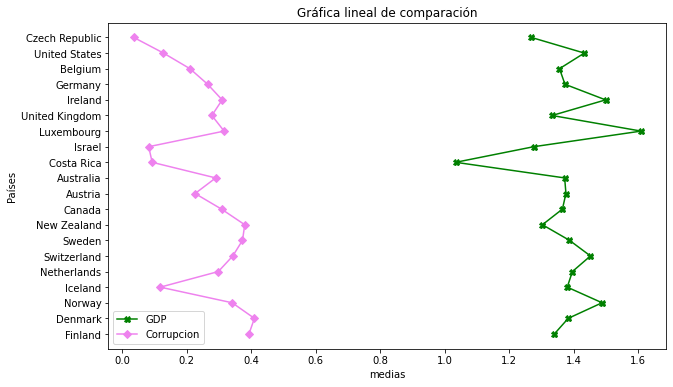

<Figure size 432x288 with 0 Axes>

In [59]:
fig,ax = plt.subplots(figsize= (10,6))

#GDP per capita
x = df["GDP per capita"].head(20)
y = df["Country or region"].head(20)

#Perception of corruption
x2 = df["Perceptions of corruption"].head(20)
y2 = df["Country or region"].head(20)

plt.plot(x, y, c= 'green', marker= 'X' )
plt.plot(x2, y2, c= 'violet', marker ='D')
plt.title('Gráfica lineal de comparación')

ax.set_xlabel('medias')
ax.set_ylabel('Países')
ax.legend(labels=['GDP','Corrupcion'])
plt.show()

plt.savefig("Gráfica lineal de dos conjuntos de datos.png")

Gracias a la gráfica y a los datos sacados durante el ejercicio, podemos apreciar la variación entre el dinero per capita de un país y como aumenta o disminuye la corrupción entre ellos.